In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [31]:
data=pd.read_csv("SALES_BM.csv")

In [32]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [33]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [34]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

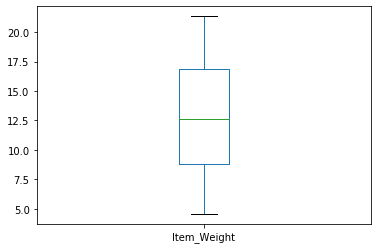

In [35]:
data["Item_Weight"].plot.box()

In [36]:
data["Item_Weight"]

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [37]:
data["Item_Weight"].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

# SHUFFLING AND CREATING TEST AND TRAIN DATASET

In [38]:
from sklearn.utils import shuffle
# shuffling the data

data=shuffle(data, random_state=42)

# creating 4 divisions

div=int(data.shape[0]/4)

# first 3 divisions train and last test

train=data.loc[:3*div+1,:]
test=data.loc[3*div+1:]

In [39]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7503,FDI28,14.300,Low Fat,0.026300,Frozen Foods,79.4302,OUT013,1987,High,Tier 3,Supermarket Type1,1743.0644
2957,NCM17,7.930,Low Fat,0.071136,Health and Hygiene,42.7086,OUT046,1997,Small,Tier 1,Supermarket Type1,356.8688
7031,FDC14,14.500,Regular,0.041313,Canned,42.0454,OUT049,1999,Medium,Tier 1,Supermarket Type1,377.5086
1084,DRC36,NaN,Regular,0.044767,Soft Drinks,173.7054,OUT027,1985,Medium,Tier 3,Supermarket Type3,5778.4782
856,FDS27,10.195,Regular,0.012456,Meat,197.5110,OUT035,2004,Small,Tier 2,Supermarket Type1,2356.9320


In [40]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
6391,DRM23,16.60,Low Fat,0.135944,Hard Drinks,172.0422,OUT049,1999,Medium,Tier 1,Supermarket Type1,2586.6330
2895,FDM27,NaN,Regular,0.277459,Meat,156.3946,OUT019,1985,Small,Tier 1,Grocery Store,473.3838
6814,FDJ57,NaN,Regular,0.000000,Seafood,184.3582,OUT019,1985,Small,Tier 1,Grocery Store,185.7582
7537,FDV08,7.35,Low Fat,0.028571,Fruits and Vegetables,40.8454,OUT013,1987,High,Tier 3,Supermarket Type1,587.2356
3425,NCA17,20.60,Low Fat,0.000000,Health and Hygiene,148.8392,OUT046,1997,Small,Tier 1,Supermarket Type1,2684.5056


# REGRESSION BENCHMARK

In [41]:
data.shape

(8523, 12)

## simple mean model(sales_outlet)

In [50]:
test["simple_mean"]=train["Item_Outlet_Sales"].mean()

<ipython-input-50-27af7b000750>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["simple_mean"]=train["Item_Outlet_Sales"].mean()


In [53]:
# calculating the mean absolute error

from sklearn.metrics import mean_absolute_error as MAE

simple_mean_error=MAE(test["simple_mean"],test["Item_Outlet_Sales"])
simple_mean_error

1355.4481105570344

## mean outlet sales with respect to outlet type

In [55]:
otype=pd.pivot_table(train, values="Item_Outlet_Sales",index="Outlet_Type",aggfunc=np.mean)
otype

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,332.606025
Supermarket Type1,2245.228499
Supermarket Type2,1938.684847
Supermarket Type3,3776.185098


In [56]:
test["outlet_type_mean"]=0

for i in train["Outlet_Type"].unique():
    test["outlet_type_mean"][test["Outlet_Type"]==str(i)]=train["Item_Outlet_Sales"][train["Outlet_Type"]==str(i)].mean()

<ipython-input-56-60e491239291>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["outlet_type_mean"]=0
<ipython-input-56-60e491239291>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["outlet_type_mean"][test["Outlet_Type"]==str(i)]=train["Item_Outlet_Sales"][train["Outlet_Type"]==str(i)].mean()
/home/ankit/miniconda3/envs/av/lib/python3.8/site-packages/pandas/core/generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

In [57]:
outlet_mean_error=MAE(test["outlet_type_mean"],test["Item_Outlet_Sales"])
outlet_mean_error

1138.8026221064356

In [59]:
out_year=pd.pivot_table(train,values="Item_Outlet_Sales",index="Outlet_Establishment_Year",aggfunc=np.mean)
out_year

,Item_Outlet_Sales
Outlet_Establishment_Year,
1985,2547.909733
1987,2160.883029
1997,2200.803276
1998,320.792473
1999,2245.345807
2002,2136.727766
2004,2415.594646
2007,2320.598343
2009,1938.684847


In [60]:
test["Outlet_Establishment_mean"]=0

for i in train["Outlet_Establishment_Year"].unique():
    test["Outlet_Establishment_mean"][test["Outlet_Establishment_Year"]==str(i)]=train["Item_Outlet_Sales"][train["Outlet_Establishment_Year"]==str(i)].mean()
    

<ipython-input-60-70e813ac5b75>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Outlet_Establishment_mean"]=0
/home/ankit/miniconda3/envs/av/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)
<ipython-input-60-70e813ac5b75>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Outlet_Establishment_mean"][test["Outlet_Establishment_Year"]==str(i)]=train["Item_Outlet_Sales"][train["Outlet_Est

In [61]:
out_est_error=MAE( test["Outlet_Establishment_mean"],test["Item_Outlet_Sales"])
out_est_error

2228.0685878504673

In [64]:
loc_type=pd.pivot_table(train,values="Item_Outlet_Sales",index="Outlet_Location_Type",aggfunc=np.mean)
loc_type

,Item_Outlet_Sales
Outlet_Location_Type,
Tier 1,1804.051997
Tier 2,2288.475485
Tier 3,2255.793325


In [68]:
test["loc_type_mean"]=0

for i in train["Outlet_Location_Type"].unique():
    test["loc_type_mean"][test["Outlet_Location_Type"]==str(i)]=train["Item_Outlet_Sales"][train["Outlet_Location_Type"]==str(i)].mean()
    

<ipython-input-68-6df4d0e479b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["loc_type_mean"]=0
<ipython-input-68-6df4d0e479b5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["loc_type_mean"][test["Outlet_Location_Type"]==str(i)]=train["Item_Outlet_Sales"][train["Outlet_Location_Type"]==str(i)].mean()
/home/ankit/miniconda3/envs/av/lib/python3.8/site-packages/pandas/core/generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [69]:
loc_type_error=MAE(test["loc_type_mean"],test["Item_Outlet_Sales"])
loc_type_error

1348.8509267072284

In [72]:
combo=pd.pivot_table(train,values="Item_Outlet_Sales",index=["Outlet_Location_Type","Outlet_Establishment_Year"],aggfunc=np.mean)
combo

Item_Outlet_Sales
Outlet_Location_Type Outlet_Establishment_Year                   
Tier 1               1985                              344.882031
                     1997                             2200.803276
                     1999                             2245.345807
Tier 2               2002                             2136.727766
                     2004                             2415.594646
                     2007                             2320.598343
Tier 3               1985                             3776.185098
                     1987                             2160.883029
                     1998                              320.792473
                     2009                             1938.684847

In [75]:
test["super_mean"]=0


for i in train["Outlet_Location_Type"].unique():
    test["super_mean"][test["Outlet_Location_Type"]==str(i)]=train["Item_Outlet_Sales"][train["Outlet_Location_Type"]==str(i)].mean()
   
    for j in train["Outlet_Establishment_Year"].unique():
        test["super_mean"][test["Outlet_Establishment_Year"]==str(i)]=train["Item_Outlet_Sales"][train["Outlet_Establishment_Year"]==str(i)].mean()
    

<ipython-input-75-d7e8e8b7764c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["super_mean"]=0
<ipython-input-75-d7e8e8b7764c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["super_mean"][test["Outlet_Location_Type"]==str(i)]=train["Item_Outlet_Sales"][train["Outlet_Location_Type"]==str(i)].mean()
/home/ankit/miniconda3/envs/av/lib/python3.8/site-packages/pandas/core/generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

In [76]:
supe_mean_error=MAE(test["super_mean"],test["Item_Outlet_Sales"])
supe_mean_error

1348.8509267072284

# CLASSIFICATION BENCHMARK

In [91]:
from sklearn.metrics import accuracy_score
df=pd.read_csv("train.csv")

In [78]:
df.shape

(891, 12)

In [79]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [80]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [82]:
from sklearn.utils import shuffle

df=shuffle(df,random_state=42)
div=int(df.shape[0]/4)

train=df.loc[:3*div+1,:]
test=df.loc[3*div+1:]

In [83]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C
439,440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S
840,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S
720,721,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C


In [84]:
test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
667,668,0,3,"Rommetvedt, Mr. Knud Paust",male,NaN,0,0,312993,7.7750,NaN,S
571,572,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S
636,637,0,3,"Leinonen, Mr. Antti Gustaf",male,32.0,0,0,STON/O 2. 3101292,7.9250,NaN,S
714,715,0,2,"Greenberg, Mr. Samuel",male,52.0,0,0,250647,13.0000,NaN,S
262,263,0,1,"Taussig, Mr. Emil",male,52.0,1,1,110413,79.6500,E67,S


## simple mode

In [87]:
test["simple_mode"]=train["Survived"].mode()[0]
test["simple_mode"].head()

<ipython-input-87-89115c33d9d0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["simple_mode"]=train["Survived"].mode()[0]


667    0
571    0
636    0
714    0
262    0
Name: simple_mode, dtype: int64

In [95]:
sim_mode_acc=accuracy_score(test["simple_mode"],test["Survived"])
sim_mode_acc

0.6346863468634686

## mode based on gender

In [88]:
gender_mode=pd.crosstab(train["Survived"],train["Sex"])
gender_mode

Sex,female,male
Survived,,
0,57,321
1,167,76


In [89]:
test["gender_mode"]=test["Survived"]

for i in test["Sex"].unique():
    test["gender_mode"][test["Sex"]==str(i)]=train["Survived"][train["Sex"]==str(i)].mode()[0]

<ipython-input-89-bdbdd125e6f9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["gender_mode"]=test["Survived"]
<ipython-input-89-bdbdd125e6f9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["gender_mode"][test["Sex"]==str(i)]=train["Survived"][train["Sex"]==str(i)].mode()[0]
/home/ankit/miniconda3/envs/av/lib/python3.8/site-packages/pandas/core/generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

In [92]:
gen_mod_acc=accuracy_score(test["gender_mode"],test["Survived"])
gen_mod_acc

0.7896678966789668

## mode based on passenger class

In [96]:
pclass_mode=pd.crosstab(train["Survived"],train["Pclass"])
pclass_mode

Pclass,1,2,3
Survived,,,
0,50,66,262
1,97,65,81


In [101]:
test["pclass_mode"]=test["Survived"]

for i in test["Pclass"].unique():
    test["pclass_mode"][test["Pclass"]==str(i)]=train["Survived"][train["Pclass"]==str(i)].mode()

<ipython-input-101-d2a492fe7ecc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["pclass_mode"][test["Pclass"]==str(i)]=train["Survived"][train["Pclass"]==str(i)].mode()


In [102]:
pclass_mod_acc=accuracy_score(test["pclass_mode"],test["Survived"])
pclass_mod_acc

1.0